This notebook is an example (with random data, so don’t try to interpret them) to generate a boxplot that helps you identify error patterns among months of the year and other categories (eg: weekday/weekend)

Error is this case is simply Forecast-Actual, but it can be any error metrics.
On the y axis is the error values, on the x axis its distribution among months of the year and between the category Weekend/WeekDay. 


# Libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

# Creating a fake df

In [30]:
df = pd.DataFrame()
df.loc[:, "Actual"] = np.random.normal(100, 10, 365)
df.loc[:, "RandomError"] = np.random.normal(0.5, 0.02, 365)
df.loc[:, "Forecast"] = df.loc[:, "Actual"]*(1+df.loc[:, "RandomError"])

# Adding a sequence of dates 

In [31]:
time_range = pd.Series(pd.date_range(start="01/01/2022", end="31/12/2022", freq="D"))
df.loc[:, "Date"] = time_range
df.head()              

,Actual,RandomError,Forecast,Date
0,89.044035,0.476611,131.483439,2022-01-01
1,109.358431,0.484806,162.376079,2022-01-02
2,100.675674,0.486635,149.668021,2022-01-03
3,96.770650,0.502814,145.428322,2022-01-04
4,99.121960,0.475809,146.285048,2022-01-05


# Generate categories

In [32]:
date_var = "Date"

## Weekdays

In [33]:
df.loc[:,'Day'] = df.loc[:, date_var].dt.weekday

In [34]:
df.head() 

,Actual,RandomError,Forecast,Date,Day
0,89.044035,0.476611,131.483439,2022-01-01,5
1,109.358431,0.484806,162.376079,2022-01-02,6
2,100.675674,0.486635,149.668021,2022-01-03,0
3,96.770650,0.502814,145.428322,2022-01-04,1
4,99.121960,0.475809,146.285048,2022-01-05,2


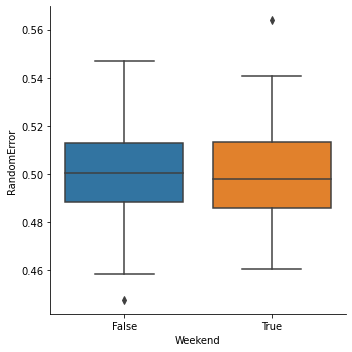

In [40]:
df["Weekend"] = df["Day"].isin([5,6])
sns.catplot(
    data=df[["Date", "RandomError", "Weekend"]], x="Weekend", y="RandomError", kind="box", dodge=False,
)

## Months

In [41]:
df.loc[:,'Month'] = df.loc[:, date_var].dt.month

In [42]:
df.head()

,Actual,RandomError,Forecast,Date,Day,Weekend,Month
0,89.044035,0.476611,131.483439,2022-01-01,5,True,1
1,109.358431,0.484806,162.376079,2022-01-02,6,True,1
2,100.675674,0.486635,149.668021,2022-01-03,0,False,1
3,96.770650,0.502814,145.428322,2022-01-04,1,False,1
4,99.121960,0.475809,146.285048,2022-01-05,2,False,1


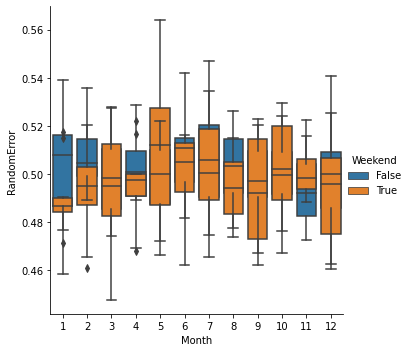

In [43]:
sns.catplot(
    data=df[["Date", "RandomError", "Weekend", "Month"]], x="Month", y="RandomError", hue="Weekend", kind="box", dodge=False,
)